# Identify the measures that we want to use from the data set by running correlation matricies 

### Import CSV files for State and County and get them into a Panda Dataframe

In [1]:
#import dependancies
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import pearsonr

In [2]:
# Import CSV filepath
county_data = pd.read_csv('../data/processed/county_data.csv')
county_df = pd.DataFrame(county_data)

state_data = pd.read_csv('../data/processed/state_data.csv')
state_df = pd.DataFrame(state_data)

#show sample of county dataframe
county_df.sample(7)

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding,longitude,latitude,population,median_income
2902,51029,Virginia,Buckingham,40.8,0.747510,8.2,-0.538798,32.715169,1.284924,15.548359,...,58.88588,254.0,3.936764,4.382989,0.403361,1.260504,-78.5287,37.5722,17087.0,48603.0
1440,27149,Minnesota,Stevens,34.1,-0.723997,9.1,-1.302983,72.391686,-0.460443,21.352886,...,93.39006,117.0,2.187325,3.087321,0.678426,2.523745,-96.0003,45.5861,9770.0,65503.0
1027,21005,Kentucky,Anderson,34.3,-0.680071,8.2,-0.538798,29.448264,1.428634,15.372021,...,41.28137,379.0,3.159913,4.312213,0.799543,0.628212,-84.9909,38.0040,22580.0,54413.0
403,12127,Florida,Volusia,35.1,-0.504369,7.3,0.225388,81.680014,-0.869035,20.137020,...,49.37914,8379.0,3.149278,3.669977,0.730540,1.079928,-81.1912,29.0604,546107.0,52407.0
619,16073,Idaho,Owyhee,34.7,-0.592220,7.5,0.055569,65.969949,-0.177951,14.813029,...,31.71331,191.0,3.246091,4.251541,1.918736,5.304740,-116.1700,42.5816,11724.0,48601.0
231,6079,California,San Luis Obispo,30.5,-1.514658,8.7,-0.963345,87.198680,-1.111801,19.600306,...,91.13055,4155.0,3.028359,3.419232,0.583557,3.087204,-120.4040,35.3872,282517.0,77948.0
2794,48407,Texas,San Jacinto,38.1,0.154515,6.9,0.565026,68.126414,-0.272814,16.479943,...,3.52759,584.0,4.847278,4.242442,2.365697,4.327255,-95.1669,30.5796,28574.0,44566.0


In [3]:
#show sample of state dataframe
state_df.sample(7)

,fips,state,adult_obesity_pct,food_environment_index,exercise_access_pct,excess_drinking_pct,uninsured_num,uninsured_pct,primary_care_phys_rate,prevent_hospital_rate,...,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding,longitude,latitude,population,median_income
17,21,Kentucky,40.6,6.8,69.508966,15.030609,246692.0,6.770374,62.44742,3457.0,...,66.59560,79950.0,3.903660,4.458051,1.013412,2.011092,-85.290566,37.526655,4461952,52238
23,27,Minnesota,32.4,9.1,86.427305,20.758391,247589.0,5.298654,88.18392,2225.0,...,77.67810,82583.0,2.683437,2.721412,0.797105,2.266994,-94.308767,46.316598,5600166,73382
0,1,Alabama,40.6,5.4,61.333795,14.477526,469887.0,11.693351,63.65235,3280.0,...,49.60294,59363.0,2.596766,3.934735,0.856498,1.665074,-86.828775,32.788820,4893186,52035
14,18,Indiana,36.7,6.8,76.513103,18.163530,494028.0,8.907795,65.60402,3135.0,...,59.49038,101817.0,2.990702,3.528806,0.918445,1.637102,-86.275624,39.908135,6696893,58235
22,26,Michigan,34.6,7.2,85.606090,18.997062,486048.0,6.021492,78.35189,3246.0,...,80.24626,203428.0,4.206558,3.603508,0.848908,1.605865,-85.435911,44.352475,9973907,59234
4,6,California,27.8,8.6,94.229806,17.245677,2640001.0,8.066461,81.09520,2153.0,...,92.90702,811077.0,4.212955,3.116360,1.304156,8.209804,-119.610560,37.245955,39346023,78672
9,12,Florida,28.3,7.2,87.471550,17.180965,2534999.0,15.098287,73.01275,3035.0,...,63.96544,313268.0,2.910788,2.969398,0.836557,2.972143,-82.497674,28.620415,21216924,57703


### Let's find what metrics have correlation with a correlation heatmap - COUNTY LEVEL

<Axes: >

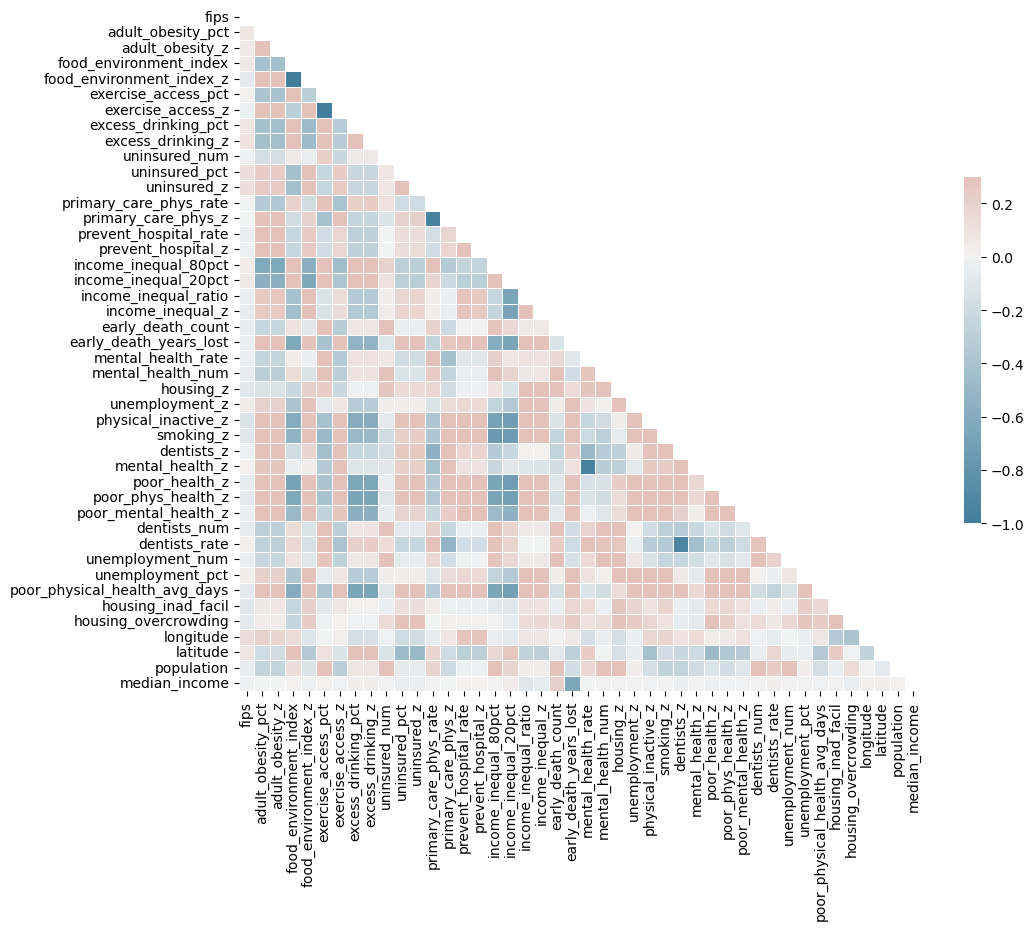

In [4]:
# Select only numerical columns to avoid errors on string values
numerical_df = county_df.select_dtypes(include=['number'])

# Compute the correlation matrix using the filtered numerical dataframe
corr = numerical_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Definitely seeing some correlation within the measures! Next, narrow down the measures to see further correlations vs Early Death Years Loss, as this measure that is seemingly an output of the factor groupings.

### Let's break this correlation analysis down further into groupings for health, socioeconomic and environmental factors

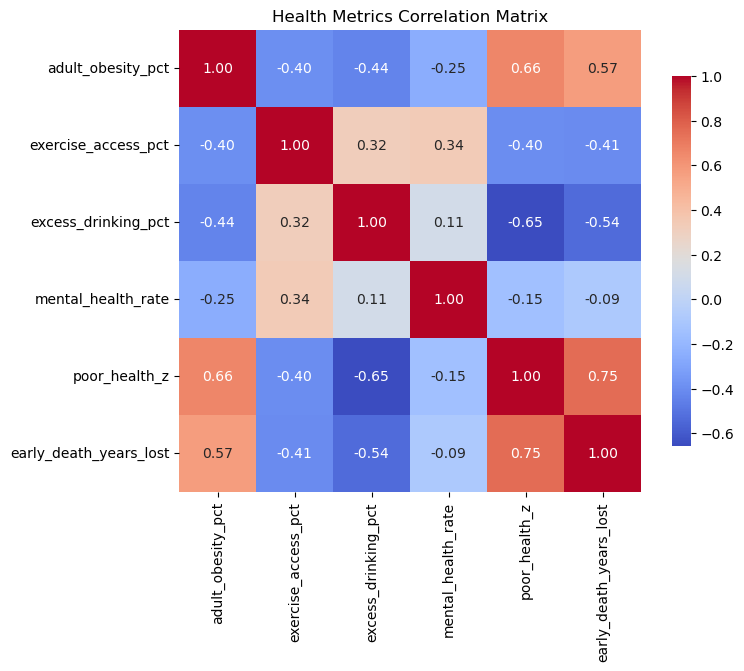

In [5]:
# Group the metrics into the corresponding factor subsets

health_metrics = ['adult_obesity_pct', 'exercise_access_pct', 'excess_drinking_pct', 'mental_health_rate', 'poor_health_z','early_death_years_lost']
socioeconomic_factors = ['uninsured_pct', 'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio', 'unemployment_pct','early_death_years_lost','median_income']
environmental_factors = ['food_environment_index', 'housing_overcrowding', 'housing_z','early_death_years_lost']

# Create smaller correlation matrices
health_corr = corr.loc[health_metrics, health_metrics]
socioeconomic_corr = corr.loc[socioeconomic_factors, socioeconomic_factors]
environmental_corr = corr.loc[environmental_factors, environmental_factors]

# Function to plot heatmap
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Plot each heatmap
plot_heatmap(health_corr, 'Health Metrics Correlation Matrix')

In [6]:
#Comments on Analysis from the Health Factor Correlation Matrix
print(f'Selected Metrics for further analysis vs Early Mortality: Poor Health, Excess Drinking, Adult Obesity ')

Selected Metrics for further analysis vs Early Mortality: Poor Health, Excess Drinking, Adult Obesity 


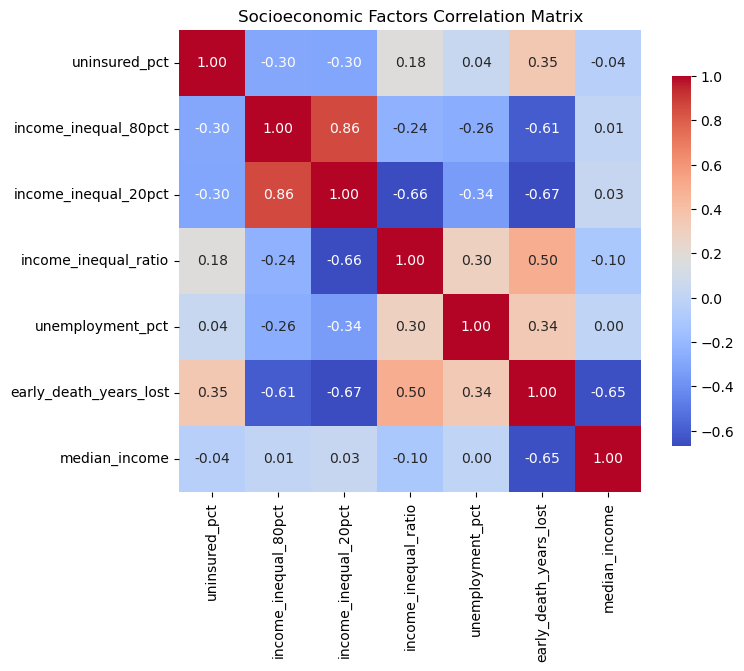

In [7]:
# Socioeconomic Factor Correlation Matrix
plot_heatmap(socioeconomic_corr, 'Socioeconomic Factors Correlation Matrix')


In [8]:
#Comments on Analysis from the Socioeconomic Factor Correlation Matrix
print(f'Selected Metrics for further analysis vs Early Mortality: Income Inequal Ratio, Income Inequal 80ct, Income Inequal 20pct ')

Selected Metrics for further analysis vs Early Mortality: Income Inequal Ratio, Income Inequal 80ct, Income Inequal 20pct 


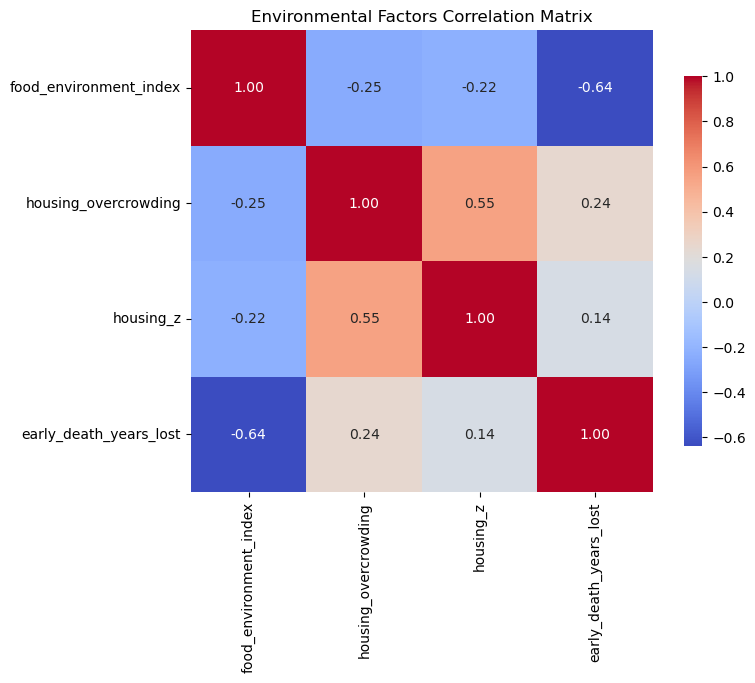

In [9]:
# Environmental Factor Correlation Matrix
plot_heatmap(environmental_corr, 'Environmental Factors Correlation Matrix')

In [10]:
#Comments on Analysis from the Environmental Factor Correlation Matrix
print(f'Selected Metrics for further analysis vs Early Mortality: Food Environment Index ')

Selected Metrics for further analysis vs Early Mortality: Food Environment Index 


## County Level Scatter Plots, Correlation and Hypothesis Testing

###  Continue comparting the selected metrics vs Early Death Year Lost by executing scatter plots, r^2 values and hypothesis testing through identifying normal distribution

In [11]:
# Drop NAN values in the dataset before beginning analysis
county_df= county_df.dropna().copy()


# Define a function to create Linear Regression plots
def cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel):
    # Set parameters
    x = x_values  
    y = y_values
    
    # Get all the needed data
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(f"The r² value is {round(r**2, 3)}")

    # Plot data points
    plt.scatter(x, y, label='County Data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')

    # Set labels
    plt.title(f"{cool_xlabel} vs {cool_ylabel}")
    plt.xlabel(cool_xlabel)
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 4)}x + {round(intercept, 2)}"
    plt.text(x.min(), y.max(), equation_text, fontsize=12, color='red')

    plt.show()

#Define a Function to determine if the x and y values are normally distributed to determine which hypothesis testing model to move forward with
def correlation_function(x_values, y_values):
    # Perform the Shapiro-Wilk test for normality
    stat_x, p_value_x = shapiro(x_values)
    stat_y, p_value_y = shapiro(y_values)

    # Check if both x and y are normally distributed
    if p_value_x > 0.05 and p_value_y > 0.05:
        # Use Pearson correlation
        correlation, p_value = pearsonr(x_values, y_values)
        correlation_type = "Pearson"
    else:
        # Use Spearman correlation
        correlation, p_value = spearmanr(x_values, y_values)
        correlation_type = "Spearman"
     
       
    # Return results
    return correlation, p_value, correlation_type


# County Level Statistically Signifigant Correlations

#### County Physical Health vs Early Mortality

The r² value is 0.533


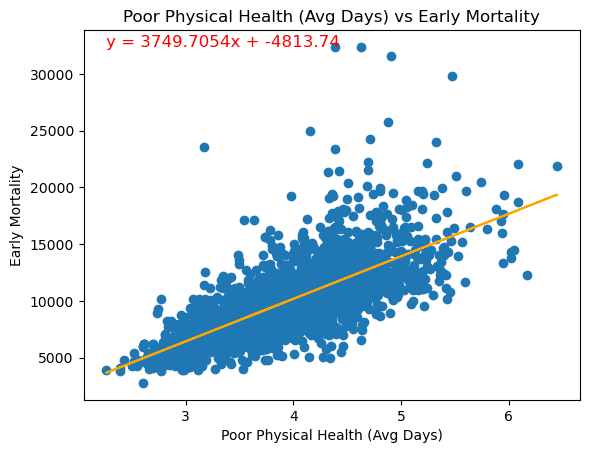

Spearman correlation: 0.7745, p-value: 0
The correlation is statistically significant and the correlation strength is strong.


In [12]:
# Set x and y values and labels
x_values = county_df["poor_physical_health_avg_days"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Poor Physical Health (Avg Days)"
cool_ylabel = "Early Mortality"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### Income Inequal 20% vs Early Mortality

The r² value is 0.462


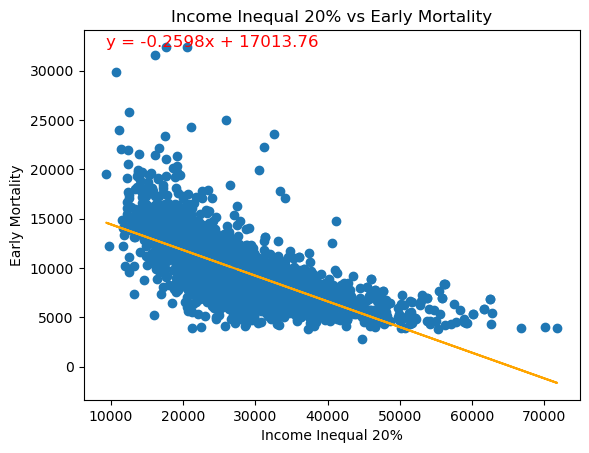

Spearman correlation: -0.7532, p-value: 0
The correlation is statistically significant and the correlation strength is strong.


In [13]:
# Set x and y values and labels
x_values = county_df["income_inequal_20pct"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Income Inequal 20%"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### Income Inequal 80% vs Early Mortality

The r² value is 0.389


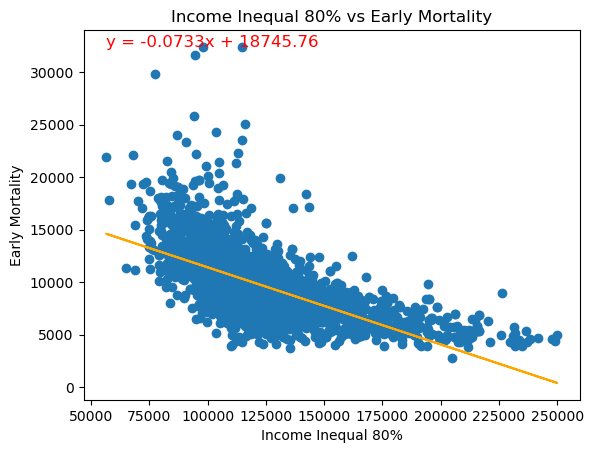

Spearman correlation: -0.7025, p-value: 0
The correlation is statistically significant and the correlation strength is strong.


In [14]:
# Set x and y values and labels
x_values = county_df["income_inequal_80pct"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Income Inequal 80%"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### County Food Environment Index vs Early Mortality

The r² value is 0.426


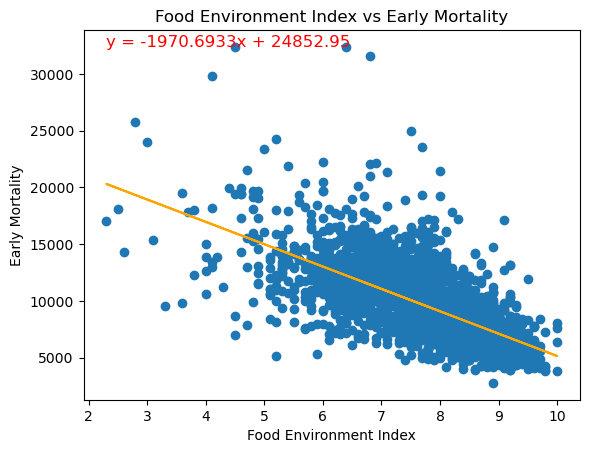

Spearman correlation: -0.6939, p-value: 0
The correlation is statistically significant and the correlation strength is moderate.


In [15]:
# Set x and y values and labels
x_values = county_df["food_environment_index"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Food Environment Index"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### Adult Obesity vs Early Mortality

The r² value is 0.318


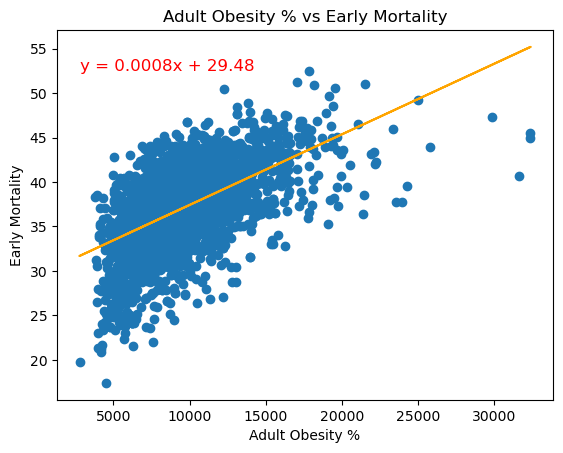

Spearman correlation: 0.5673, p-value: 2.754e-230
The correlation is statistically significant and the correlation strength is moderate.


In [16]:
# Set x and y values and labels

x_values = county_df["early_death_years_lost"]
y_values = county_df["adult_obesity_pct"]
cool_xlabel = "Adult Obesity %"
cool_ylabel = "Early Mortality"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### County Excercise Access Percent vs Early Mortality

The r² value is 0.174


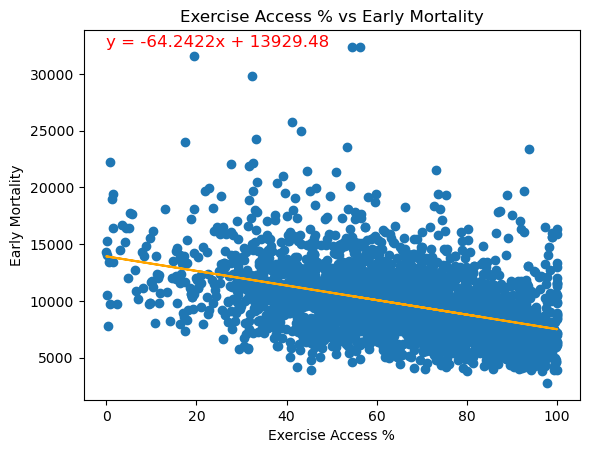

Spearman correlation: -0.4278, p-value: 8.133e-121
The correlation is statistically significant and the correlation strength is moderate.


In [17]:
# Set x and y values and labels
x_values = county_df["exercise_access_pct"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Exercise Access %"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### County Mental Health vs Early Mortality

The r² value is 0.005


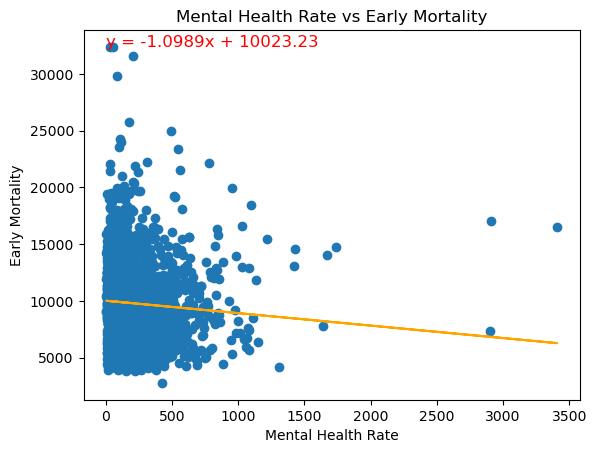

Spearman correlation: -0.195, p-value: 1.346e-24
The correlation is statistically significant and the correlation strength is weak.


In [18]:
# Set x and y values and labels
x_values = county_df["mental_health_rate"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Mental Health Rate"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")


#### County Primary Care Physician Rate vs Early Mortality

The r² value is 0.065


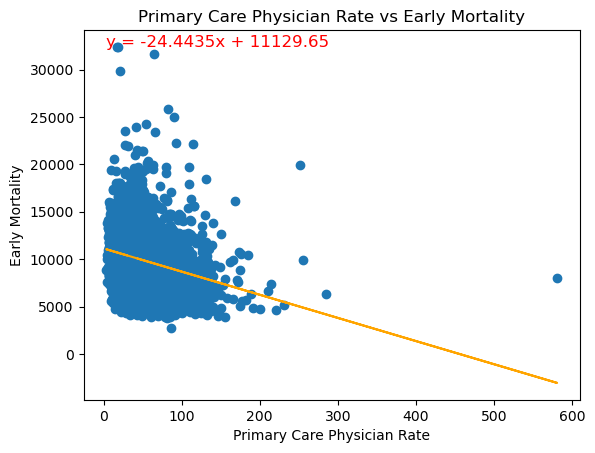

Spearman correlation: -0.3128, p-value: 1.728e-62
The correlation is statistically significant and the correlation strength is moderate.


In [19]:
# Set x and y values and labels
x_values = county_df["primary_care_phys_rate"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Primary Care Physician Rate"
cool_ylabel = "Early Mortality"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")


#### County Excess Drinking % vs Early Mortality

The r² value is 0.318


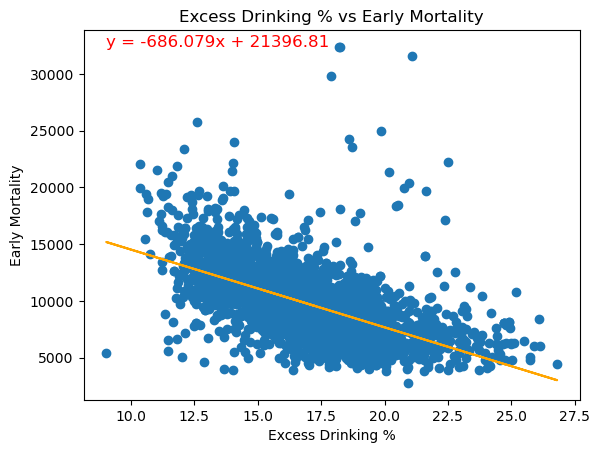

Spearman correlation: -0.6323, p-value: 5.515e-302
The correlation is statistically significant and the correlation strength is moderate.


In [20]:
# Set x and y values and labels
x_values = county_df["excess_drinking_pct"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Excess Drinking %"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")


#### County Median Income vs Early Mortality

The r² value is 0.447


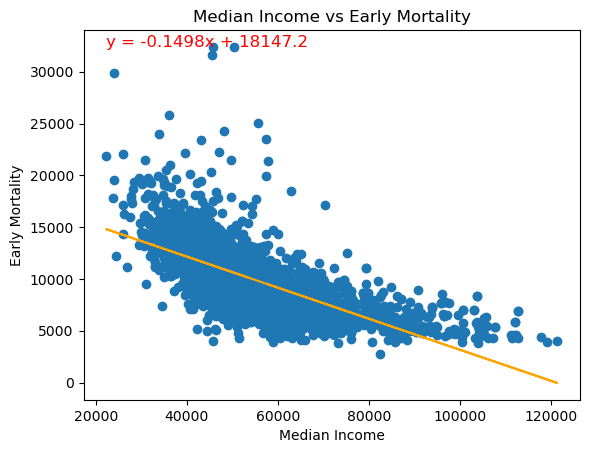

Spearman correlation: -0.7514, p-value: 0
The correlation is statistically significant and the correlation strength is strong.


In [21]:
# Set x and y values and labels

x_values = county_df["median_income"]
y_values = county_df["early_death_years_lost"]
cool_xlabel = "Median Income"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")


In [22]:
# List of y variables analyzed
x_variables = [
    "poor_physical_health_avg_days", 
    "mental_health_rate",
    "income_inequal_20pct", 
    "exercise_access_pct",
    "income_inequal_80pct", 
    "adult_obesity_pct",
    "primary_care_phys_rate",
    "excess_drinking_pct",
    "food_environment_index",
    "median_income"
]

# Set x value
y_values = county_df["early_death_years_lost"]

# Initialize lists to store results
correlation_results = []

for x_var in x_variables:
    x_values = county_df[x_var]
    
    # Call the correlation function and capture all returned values
    correlation, p_value, correlation_type = correlation_function(x_values, y_values)

    # Interpretation
    if p_value < 0.05:
        # Determine the strength of the correlation
        if abs(correlation) >= 0.7:
            strength = "strong"
        elif abs(correlation) >= 0.3:
            strength = "moderate"
        else:
            strength = "weak"
        
        # Store the results along with the correlation value and p-value
        correlation_results.append((x_var, correlation, p_value, strength))
    else:
        # Store the p-value and indicate no significant correlation
        correlation_results.append((x_var, 0.0, p_value, "no correlation"))


# Sort the results by absolute correlation value in descending order
correlation_results.sort(key=lambda x: abs(x[1]), reverse=True)

# Summary of correlations
print("\nSummary of County correlations:")
for x_var, correlation, p_value, strength in correlation_results:
    print(f"{x_var}: p-value: {p_value:.4g}, correlation: {round(correlation,4)}, strength: {strength}")






Summary of County correlations:
poor_physical_health_avg_days: p-value: 0, correlation: 0.7745, strength: strong
income_inequal_20pct: p-value: 0, correlation: -0.7532, strength: strong
median_income: p-value: 0, correlation: -0.7514, strength: strong
income_inequal_80pct: p-value: 0, correlation: -0.7025, strength: strong
food_environment_index: p-value: 0, correlation: -0.6939, strength: moderate
excess_drinking_pct: p-value: 5.515e-302, correlation: -0.6323, strength: moderate
adult_obesity_pct: p-value: 2.754e-230, correlation: 0.5673, strength: moderate
exercise_access_pct: p-value: 8.133e-121, correlation: -0.4278, strength: moderate
primary_care_phys_rate: p-value: 1.728e-62, correlation: -0.3128, strength: moderate
mental_health_rate: p-value: 1.346e-24, correlation: -0.195, strength: weak


# County Findings:
### Overall there were some strong correlations at the county level, however we want to aggregate this data up to the state level to see if the correlations get stronger.  We are choosing to move to a state level vs using a sample of county data so we can still have visibility to total data, just at a higher level

# State Analysis : what does this look like at a state level for correlation?

### Let's find what metrics have correlation with a correlation heatmap - STATE LEVEL

<Axes: >

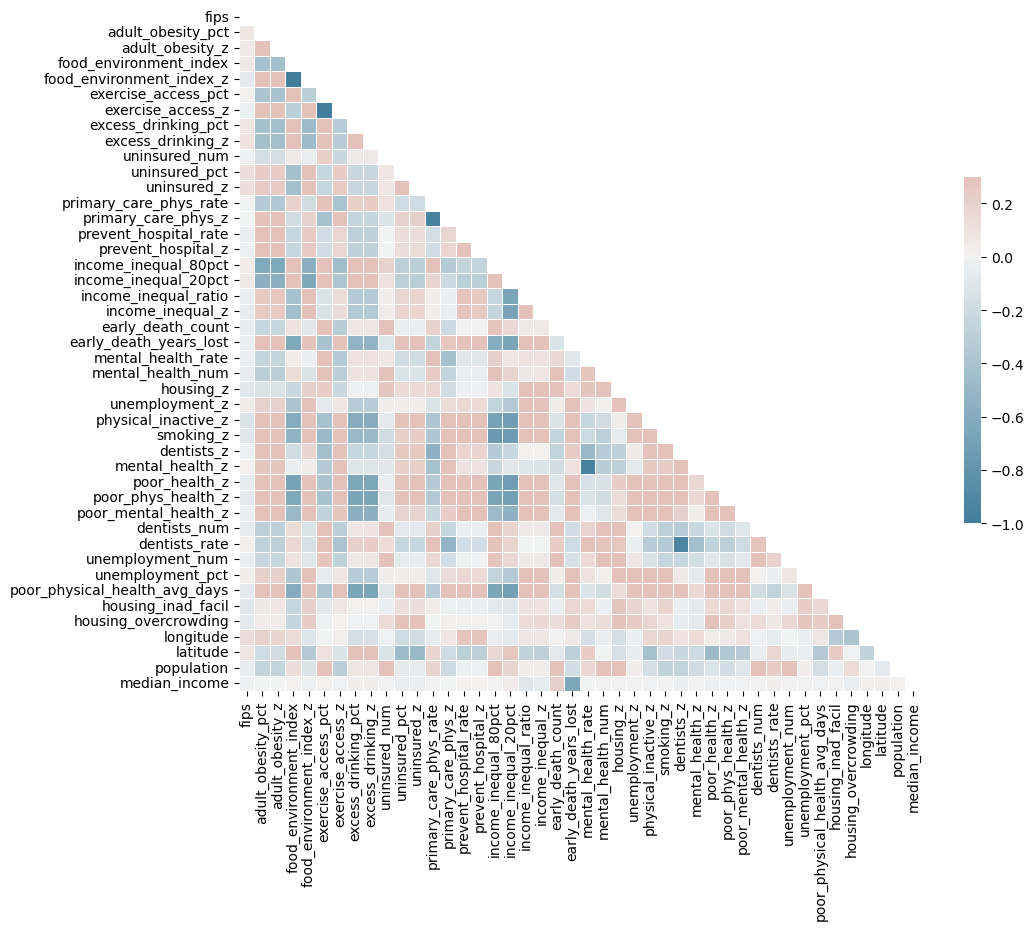

In [23]:
# Select only numerical columns to avoid errors on string values
numerical_df_state = state_df.select_dtypes(include=['number'])

# Compute the correlation matrix using the filtered numerical dataframe
corr_state = numerical_df_state.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## ADD GROUPED CORRELATION CHARTS FROM ABOVE COUNTY ANALYSIS

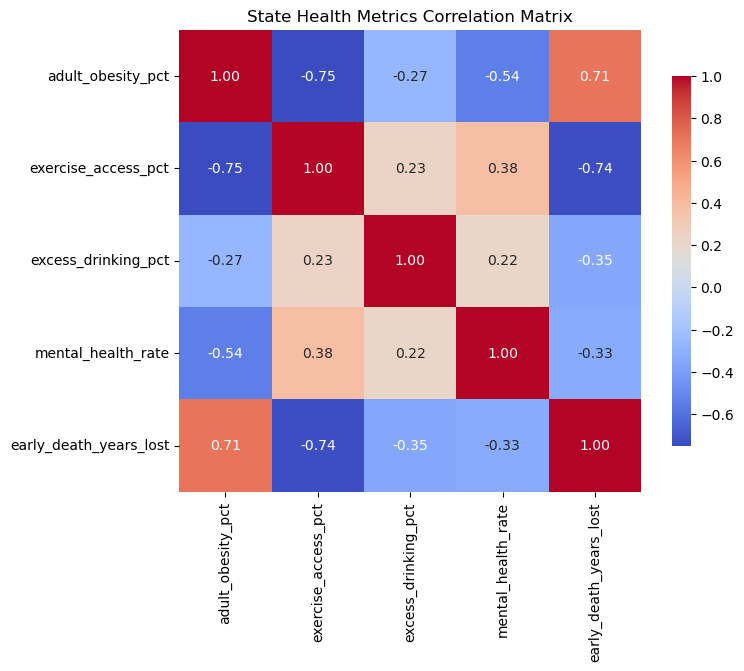

In [24]:
# Group the metrics into the corresponding factor subsets

health_metrics_state = ['adult_obesity_pct', 'exercise_access_pct', 'excess_drinking_pct', 'mental_health_rate','early_death_years_lost']
socioeconomic_factors_state = ['uninsured_pct', 'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio', 'unemployment_pct','early_death_years_lost','median_income']
environmental_factors_state = ['food_environment_index', 'housing_overcrowding','early_death_years_lost']

# Create smaller correlation matrices
health_corr_state = corr_state.loc[health_metrics_state, health_metrics_state]
socioeconomic_corr_state = corr_state.loc[socioeconomic_factors_state, socioeconomic_factors_state]
environmental_corr_state = corr_state.loc[environmental_factors_state, environmental_factors_state]

# Function to plot heatmap
def plot_heatmap_state(corr_matrix_state, title):
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.heatmap(corr_matrix_state, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Plot each heatmap
plot_heatmap_state(health_corr_state, 'State Health Metrics Correlation Matrix')


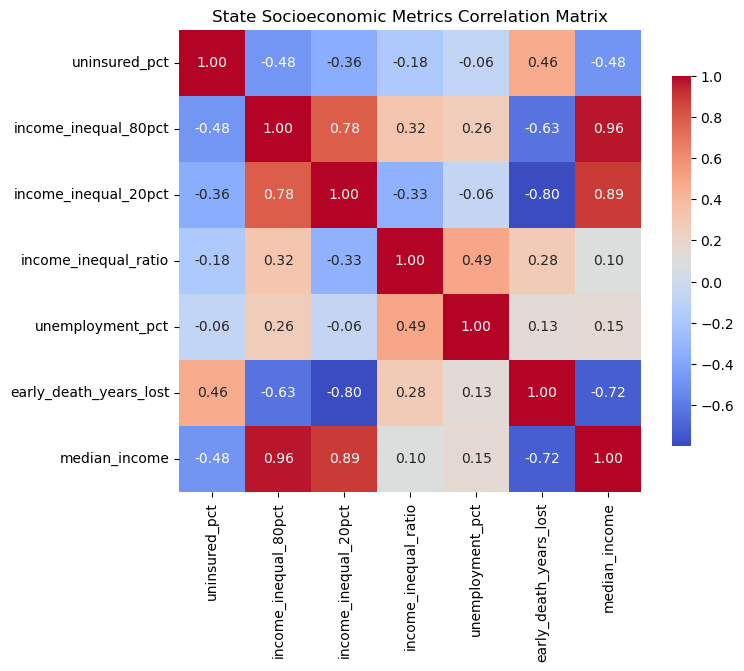

In [25]:
plot_heatmap_state(socioeconomic_corr_state, 'State Socioeconomic Metrics Correlation Matrix')

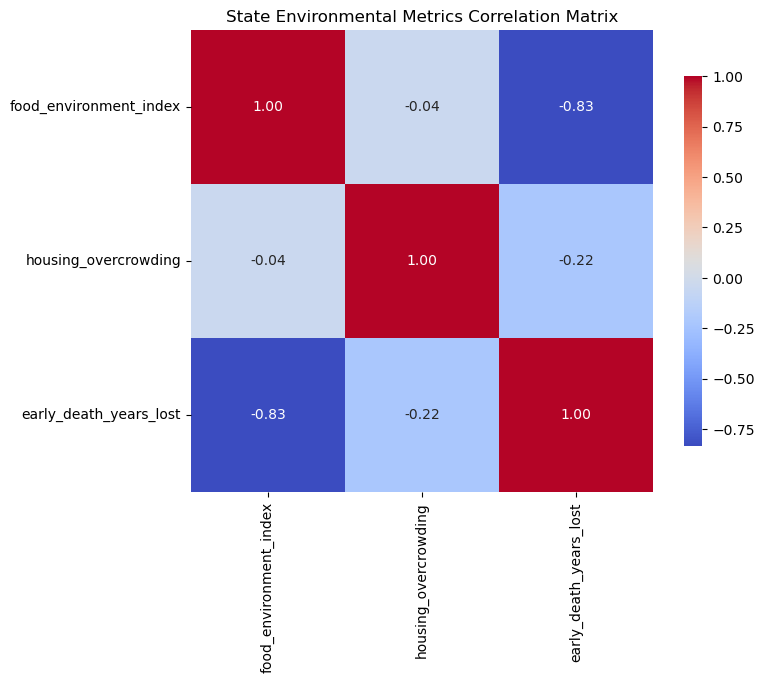

In [26]:
plot_heatmap_state(environmental_corr_state, 'State Environmental Metrics Correlation Matrix')

## State Level Scatter Plots, Correlation and Hypothesis Testing

In [27]:
# Define a function to create Linear Regression plots - States
def cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel):
    # Set parameters
    x = x_values  
    y = y_values
    
    # Get all the needed data
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(f"The r² value is {round(r**2, 3)}")

    # Plot data points
    plt.scatter(x, y, label='State Data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')

    # Set labels
    plt.title(f"{cool_xlabel} vs {cool_ylabel}")
    plt.xlabel(cool_xlabel)
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 4)}x + {round(intercept, 2)}"
    plt.text(x.min(), y.max(), equation_text, fontsize=12, color='red')

    plt.show()

#Define a Function to determine if the x and y values are normally distributed to determine which hypothesis testing model to move forward with
def correlation_function_state(x_values, y_values):
    # Perform the Shapiro-Wilk test for normality
    stat_x, p_value_x = shapiro(x_values)
    stat_y, p_value_y = shapiro(y_values)

    # Check if both x and y are normally distributed
    if p_value_x > 0.05 and p_value_y > 0.05:
        # Use Pearson correlation
        correlation, p_value = pearsonr(x_values, y_values)
        correlation_type = "Pearson"
    else:
        # Use Spearman correlation
        correlation, p_value = spearmanr(x_values, y_values)
        correlation_type = "Spearman"
     
       
    # Return results
    return correlation, p_value, correlation_type


#### State Food Environment Index vs Early Mortality

The r² value is 0.695


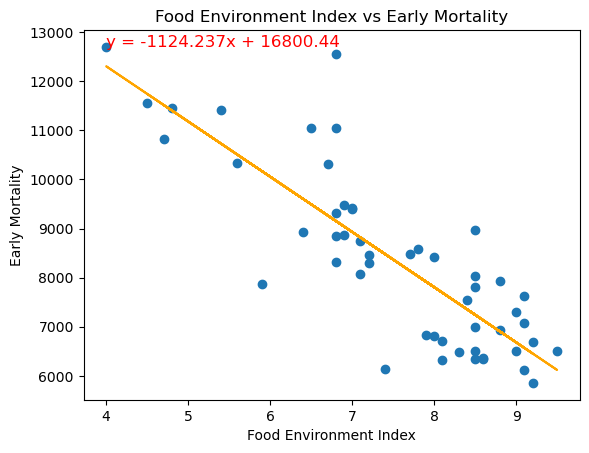

Spearman correlation: -0.8077, p-value: 7.914e-13
The correlation is statistically significant and the correlation strength is strong.


In [28]:
# Set x and y values and labels

x_values = state_df["food_environment_index"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Food Environment Index"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### Income Inequal 20% vs Early Mortality

The r² value is 0.637


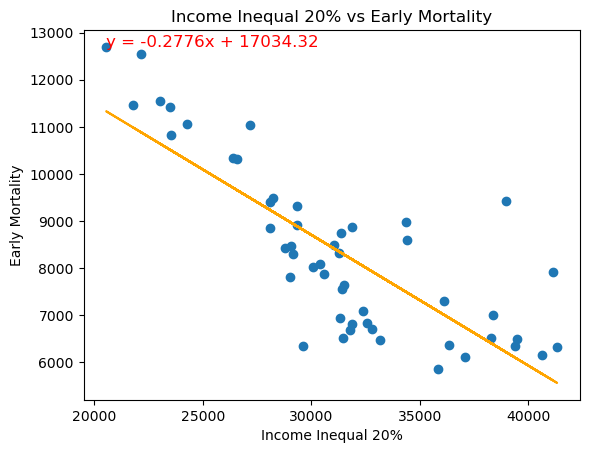

Spearman correlation: -0.7744, p-value: 2.625e-11
The correlation is statistically significant and the correlation strength is strong.


In [29]:
# Set x and y values and labels

x_values = state_df["income_inequal_20pct"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Income Inequal 20%"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Income Inequal 80% vs Early Mortality

The r² value is 0.403


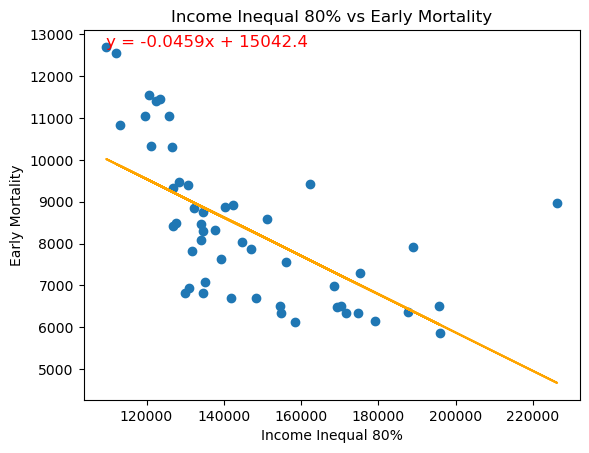

Spearman correlation: -0.757, p-value: 1.296e-10
The correlation is statistically significant and the correlation strength is strong.


In [30]:
# Set x and y values and labels

x_values = state_df["income_inequal_80pct"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Income Inequal 80%"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Adult Obesity % vs Early Mortality

The r² value is 0.505


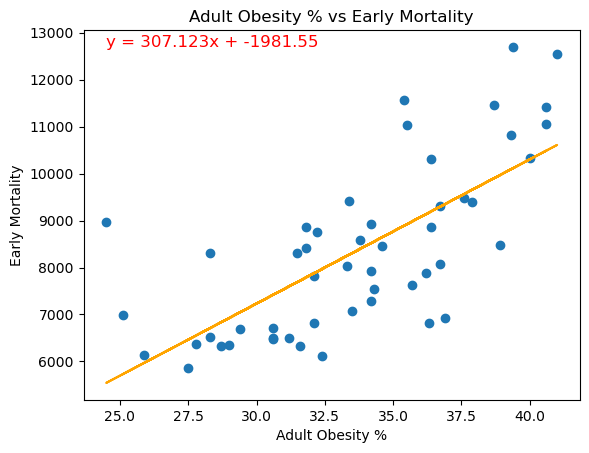

Spearman correlation: 0.7132, p-value: 4.301e-09
The correlation is statistically significant and the correlation strength is strong.


In [31]:
# Set x and y values and labels

x_values = state_df["adult_obesity_pct"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Adult Obesity %"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Poor Physical Health (Avg Days) vs Early Mortality

The r² value is 0.543


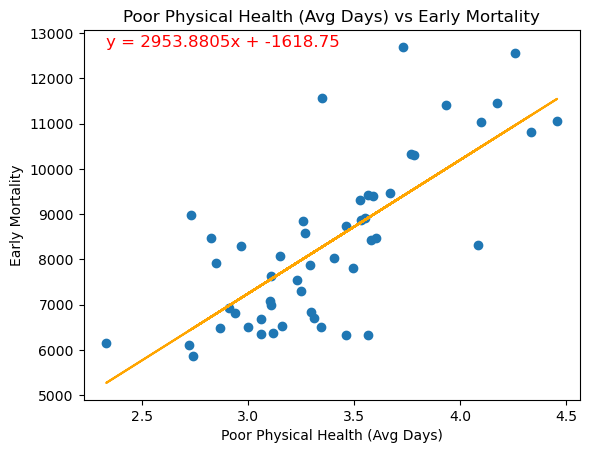

Spearman correlation: 0.6972, p-value: 1.317e-08
The correlation is statistically significant and the correlation strength is moderate.


In [32]:
# Set x and y values and labels

x_values = state_df["poor_physical_health_avg_days"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Poor Physical Health (Avg Days)"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Exercise Access % vs Early Mortality

The r² value is 0.55


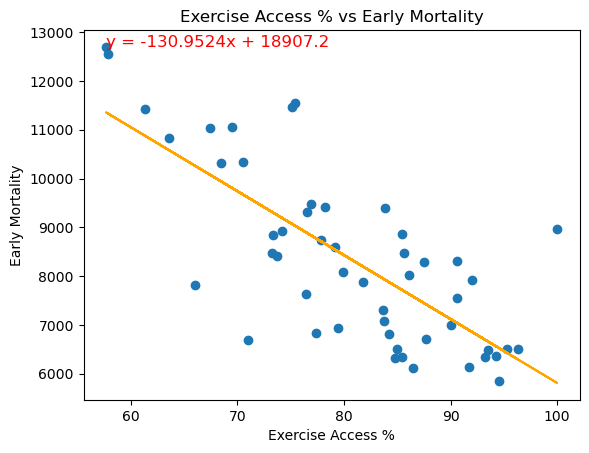

Spearman correlation: -0.6877, p-value: 2.478e-08
The correlation is statistically significant and the correlation strength is moderate.


In [33]:
# Set x and y values and labels

x_values = state_df["exercise_access_pct"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Exercise Access %"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Mental Health Rate vs Early Mortality

The r² value is 0.111


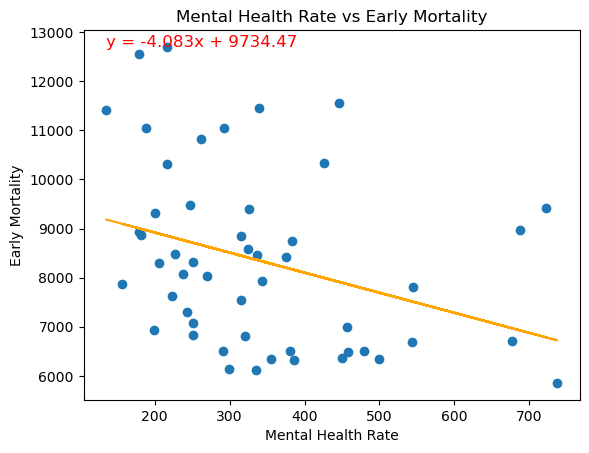

Spearman correlation: -0.3997, p-value: 0.00366
The correlation is statistically significant and the correlation strength is moderate.


In [34]:
# Set x and y values and labels

x_values = state_df["mental_health_rate"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Mental Health Rate"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Primary Care Physician Rate vs Early Mortality

The r² value is 0.168


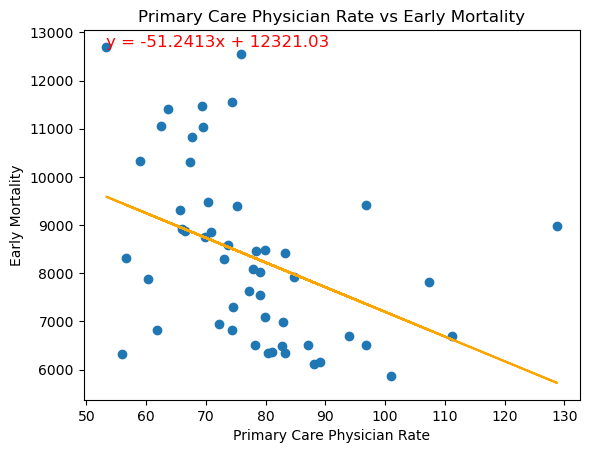

Spearman correlation: -0.527, p-value: 7.105e-05
The correlation is statistically significant and the correlation strength is moderate.


In [35]:
# Set x and y values and labels

x_values = state_df["primary_care_phys_rate"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Primary Care Physician Rate"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Excess Drinking Percent Rate vs Early Mortality

The r² value is 0.125


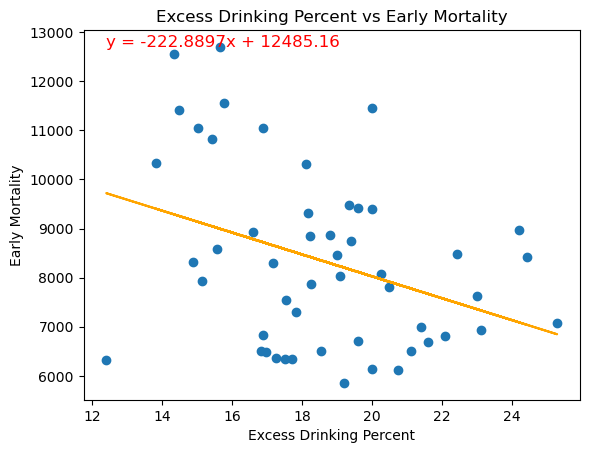

Spearman correlation: -0.2865, p-value: 0.04151
The correlation is statistically significant and the correlation strength is weak.


In [36]:
# Set x and y values and labels

x_values = state_df["excess_drinking_pct"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Excess Drinking Percent"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Median Income vs Early Mortality

The r² value is 0.521


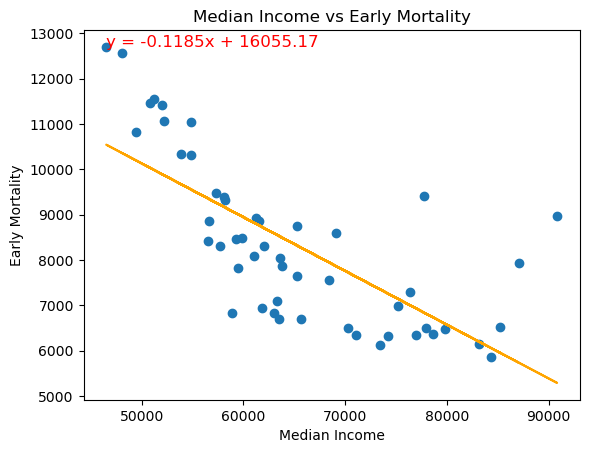

Spearman correlation: -0.7665, p-value: 5.508e-11
The correlation is statistically significant and the correlation strength is strong.


In [37]:
# Set x and y values and labels

x_values = state_df["median_income"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Median Income"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

In [38]:
state_df.columns

Index(['fips', 'state', 'adult_obesity_pct', 'food_environment_index',
       'exercise_access_pct', 'excess_drinking_pct', 'uninsured_num',
       'uninsured_pct', 'primary_care_phys_rate', 'prevent_hospital_rate',
       'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio',
       'early_death_count', 'early_death_years_lost', 'mental_health_ratio',
       'mental_health_rate', 'mental_health_num', 'dentists_ratio',
       'dentists_num', 'dentists_rate', 'unemployment_num', 'unemployment_pct',
       'poor_physical_health_avg_days', 'housing_inad_facil',
       'housing_overcrowding', 'longitude', 'latitude', 'population',
       'median_income'],
      dtype='object')

#### State Unemployment % vs Early Mortality

The r² value is 0.017


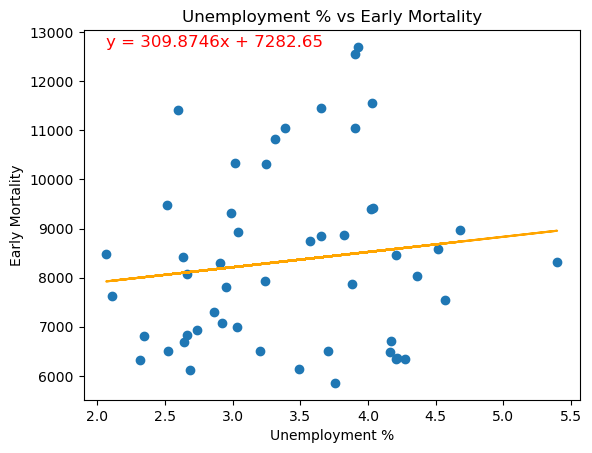

Spearman correlation: 0.11, p-value: 0.442
The correlation is not statistically significant.


In [39]:
# Set x and y values and labels

x_values = state_df["unemployment_pct"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Unemployment %"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

#### State Inadequate Housing Facility % vs Early Mortality

The r² value is 0.0


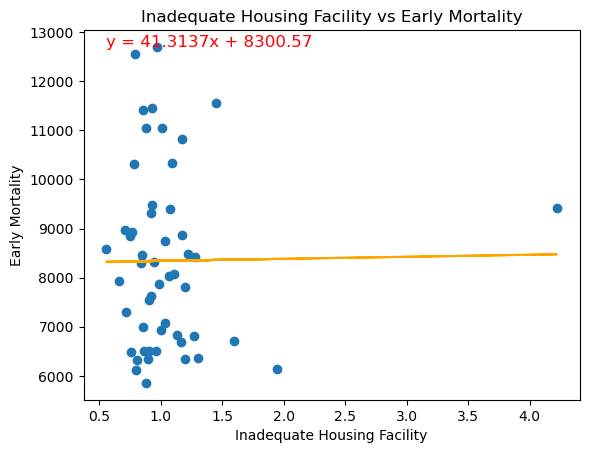

Spearman correlation: -0.0358, p-value: 0.8028
The correlation is not statistically significant.


In [40]:
# Set x and y values and labels

x_values = state_df["housing_inad_facil"]
y_values = state_df["early_death_years_lost"]
cool_xlabel = "Inadequate Housing Facility"
cool_ylabel = "Early Mortality"


# Create the linear regression plot
cool_linear_regression_function_state(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {p_value:.4g}")

# Interpretation
if p_value < 0.05:
    
    # Determine the strength of the correlation
    if abs(correlation) >= 0.7:
        strength = "strong"
    elif abs(correlation) >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    print(f"The correlation is statistically significant and the correlation strength is {strength}.")
else:
    print("The correlation is not statistically significant.")

In [41]:
# List of y variables analyzed
x_variables_state = [
    "poor_physical_health_avg_days", 
    "mental_health_rate",
    "income_inequal_20pct", 
    "exercise_access_pct",
    "income_inequal_80pct", 
    "adult_obesity_pct",
    "primary_care_phys_rate",
    "excess_drinking_pct",
    "food_environment_index",
    "median_income",
    "unemployment_pct",
    "housing_inad_facil"
]

# Set x value
y_values_state = state_df["early_death_years_lost"]

# Initialize lists to store results
correlation_results_state = []

for x_var in x_variables_state:
    x_values = state_df[x_var]
    
    # Call the correlation function and capture all returned values
    correlation, p_value, correlation_type = correlation_function_state(x_values, y_values)

    # Interpretation
    if p_value < 0.05:
        # Determine the strength of the correlation
        if abs(correlation) >= 0.7:
            strength = "strong"
        elif abs(correlation) >= 0.3:
            strength = "moderate"
        else:
            strength = "weak"
        
        # Store the results along with the correlation value and p-value
        correlation_results_state.append((x_var, correlation, p_value, strength))
    else:
        # Store the p-value and indicate no significant correlation
        correlation_results_state.append((x_var, 0.0, p_value, "no correlation"))


# Sort the results by absolute correlation value in descending order
correlation_results_state.sort(key=lambda x: abs(x[1]), reverse=True)

# Summary of correlations
print("\nSummary of State correlations on Early Mortality:")
for x_var, correlation, p_value, strength in correlation_results_state:
    print(f"{x_var}: p-value: {p_value:.4g}, correlation: {round(correlation,4)}, strength: {strength}")


# Summary of correlations
print("\nSummary of County correlations on Early Mortality:")
for x_var, correlation, p_value, strength in correlation_results:
    print(f"{x_var}: p-value: {p_value:.4g}, correlation: {round(correlation,4)}, strength: {strength}")


Summary of State correlations on Early Mortality:
food_environment_index: p-value: 7.914e-13, correlation: -0.8077, strength: strong
income_inequal_20pct: p-value: 2.625e-11, correlation: -0.7744, strength: strong
median_income: p-value: 5.508e-11, correlation: -0.7665, strength: strong
income_inequal_80pct: p-value: 1.296e-10, correlation: -0.757, strength: strong
adult_obesity_pct: p-value: 4.301e-09, correlation: 0.7132, strength: strong
poor_physical_health_avg_days: p-value: 1.317e-08, correlation: 0.6972, strength: moderate
exercise_access_pct: p-value: 2.478e-08, correlation: -0.6877, strength: moderate
primary_care_phys_rate: p-value: 7.105e-05, correlation: -0.527, strength: moderate
mental_health_rate: p-value: 0.00366, correlation: -0.3997, strength: moderate
excess_drinking_pct: p-value: 0.04151, correlation: -0.2865, strength: weak
unemployment_pct: p-value: 0.442, correlation: 0.0, strength: no correlation
housing_inad_facil: p-value: 0.8028, correlation: 0.0, strength: 

## State Findings : Correlated measures at the state and county level are differing.  There are strong and moderate correlations across both datasets.  Continuing forward we are going to look at the state dataset and focus on the top 6 correlating measures

In [42]:
# Sort the results by absolute correlation value in descending order
correlation_results.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the top four results
print("\nTop 7 State Correlation Results on Early Mortality:")
for x_var, correlation, p_value, strength in correlation_results_state[:7]:
    print(f"{x_var}")



Top 7 State Correlation Results on Early Mortality:
food_environment_index
income_inequal_20pct
median_income
income_inequal_80pct
adult_obesity_pct
poor_physical_health_avg_days
exercise_access_pct


## Taking the view up another level, let's look at some mapping by region

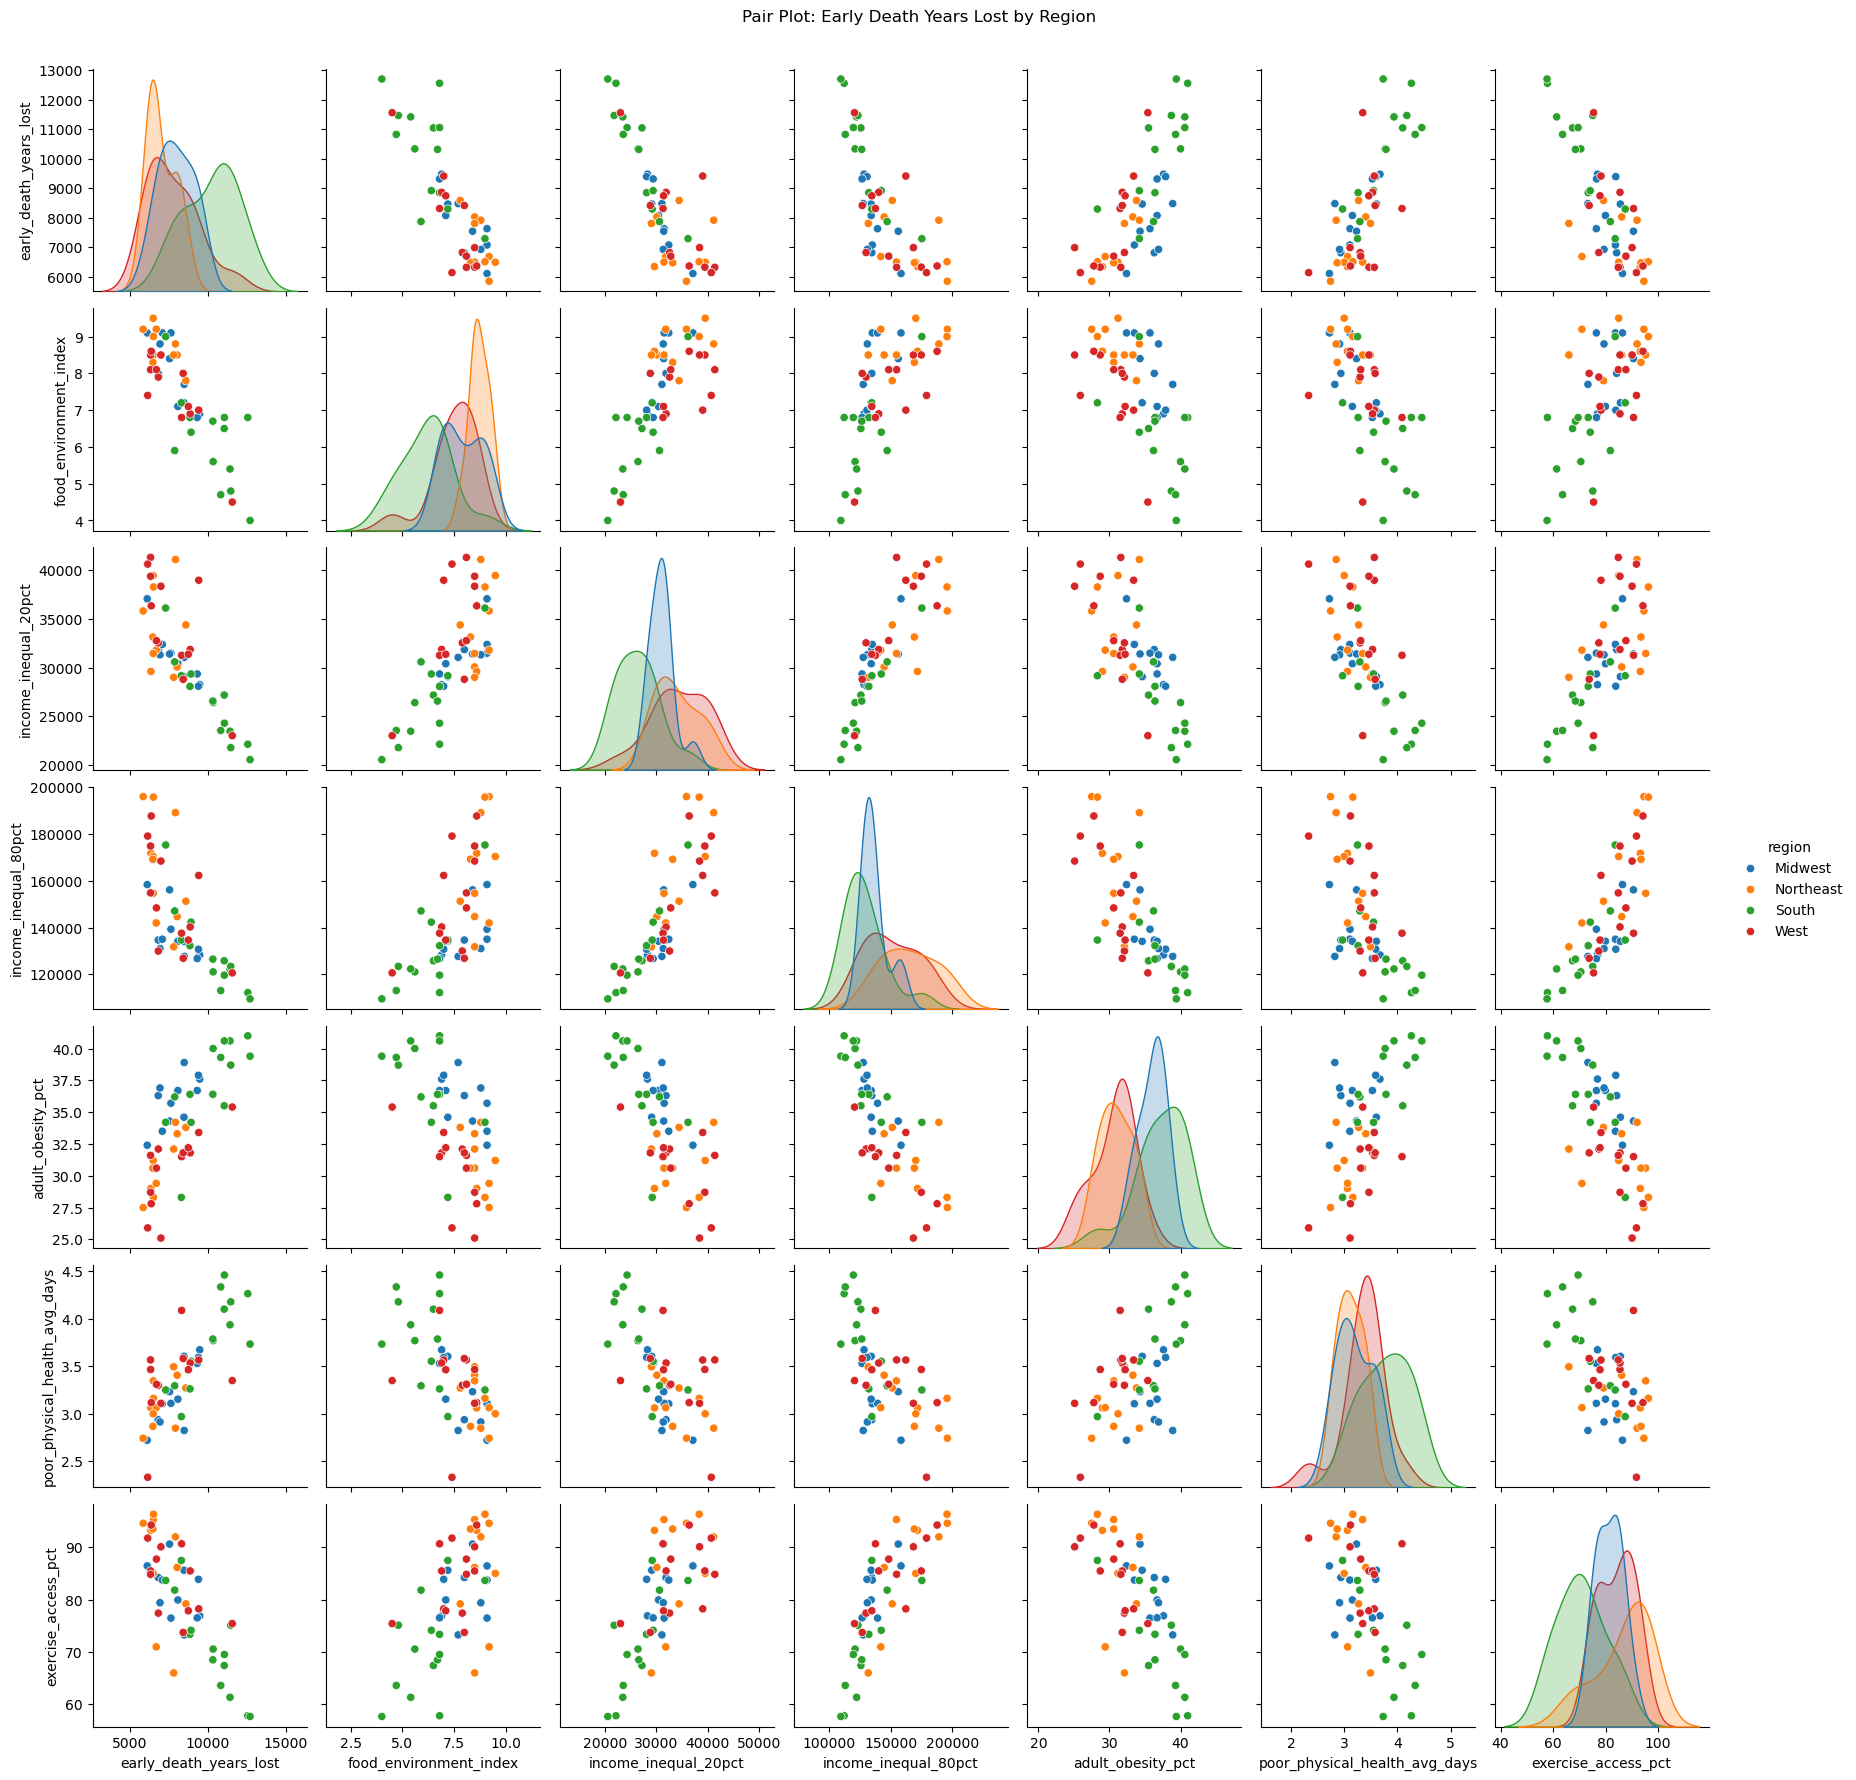

In [43]:
#Adding region to df
region_df = state_df.copy()
region_mapping = {'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South', 'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast', 'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'Northeast', 'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South', 'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'South', 'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South', 'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'South', 'South Dakota': 'Midwest', 'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast', 'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest', 'Wyoming': 'West'}

# Add a new column for the region
region_df['region'] = region_df['state'].map(region_mapping)

# Sort the DataFrame by region
region_df = region_df.sort_values(by='region')
sns.pairplot(region_df, hue='region', vars=[
    'early_death_years_lost', 
    'food_environment_index',
    'income_inequal_20pct',
    'income_inequal_80pct',
    'adult_obesity_pct',
    'poor_physical_health_avg_days',
    'exercise_access_pct'
])

plt.suptitle('Pair Plot: Early Death Years Lost by Region', y=1.02)
plt.show()

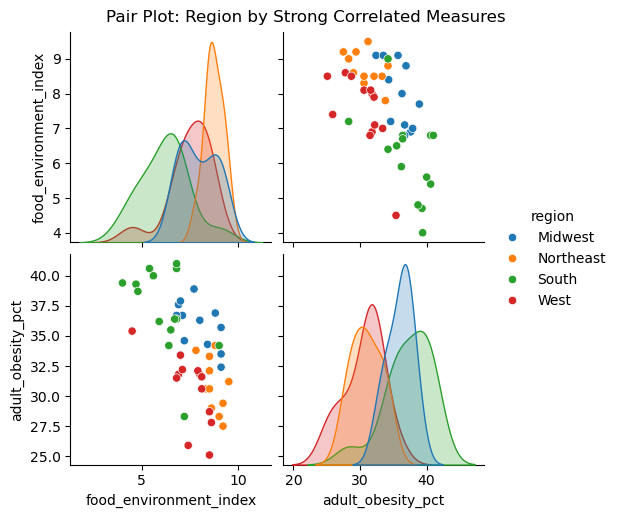

In [44]:
# #Adding region to df
# region_df = state_df.copy()
# region_mapping = {'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South', 'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast', 'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'Northeast', 'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South', 'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'South', 'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South', 'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'South', 'South Dakota': 'Midwest', 'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast', 'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest', 'Wyoming': 'West'}

# # Add a new column for the region
# region_df['region'] = region_df['state'].map(region_mapping)

# Sort the DataFrame by region
region_df = region_df.sort_values(by='region')
sns.pairplot(region_df, hue='region', vars=[ 
    'food_environment_index',
    'adult_obesity_pct',
])

plt.suptitle('Pair Plot: Region by Strong Correlated Measures', y=1.02)
plt.show()

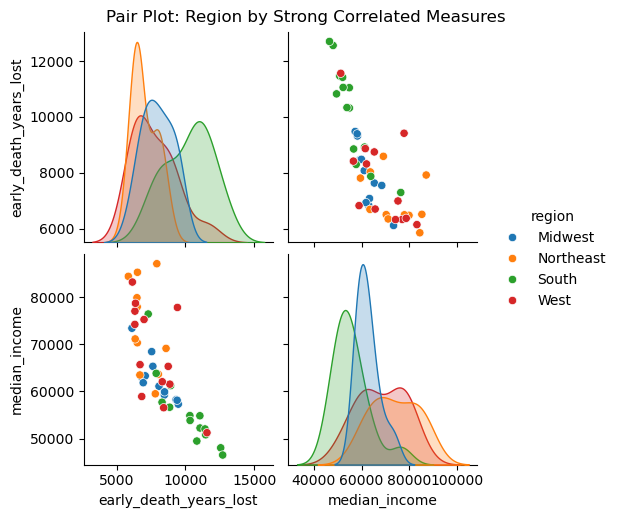

In [45]:
# #Adding region to df
# region_df = state_df.copy()
# region_mapping = {'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South', 'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast', 'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'Northeast', 'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South', 'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'South', 'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South', 'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'South', 'South Dakota': 'Midwest', 'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast', 'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest', 'Wyoming': 'West'}

# # Add a new column for the region
# region_df['region'] = region_df['state'].map(region_mapping)

# Sort the DataFrame by region
region_df = region_df.sort_values(by='region')
sns.pairplot(region_df, hue='region', vars=[ 
    'early_death_years_lost',
    'median_income',
])

plt.suptitle('Pair Plot: Region by Strong Correlated Measures', y=1.02)
plt.show()

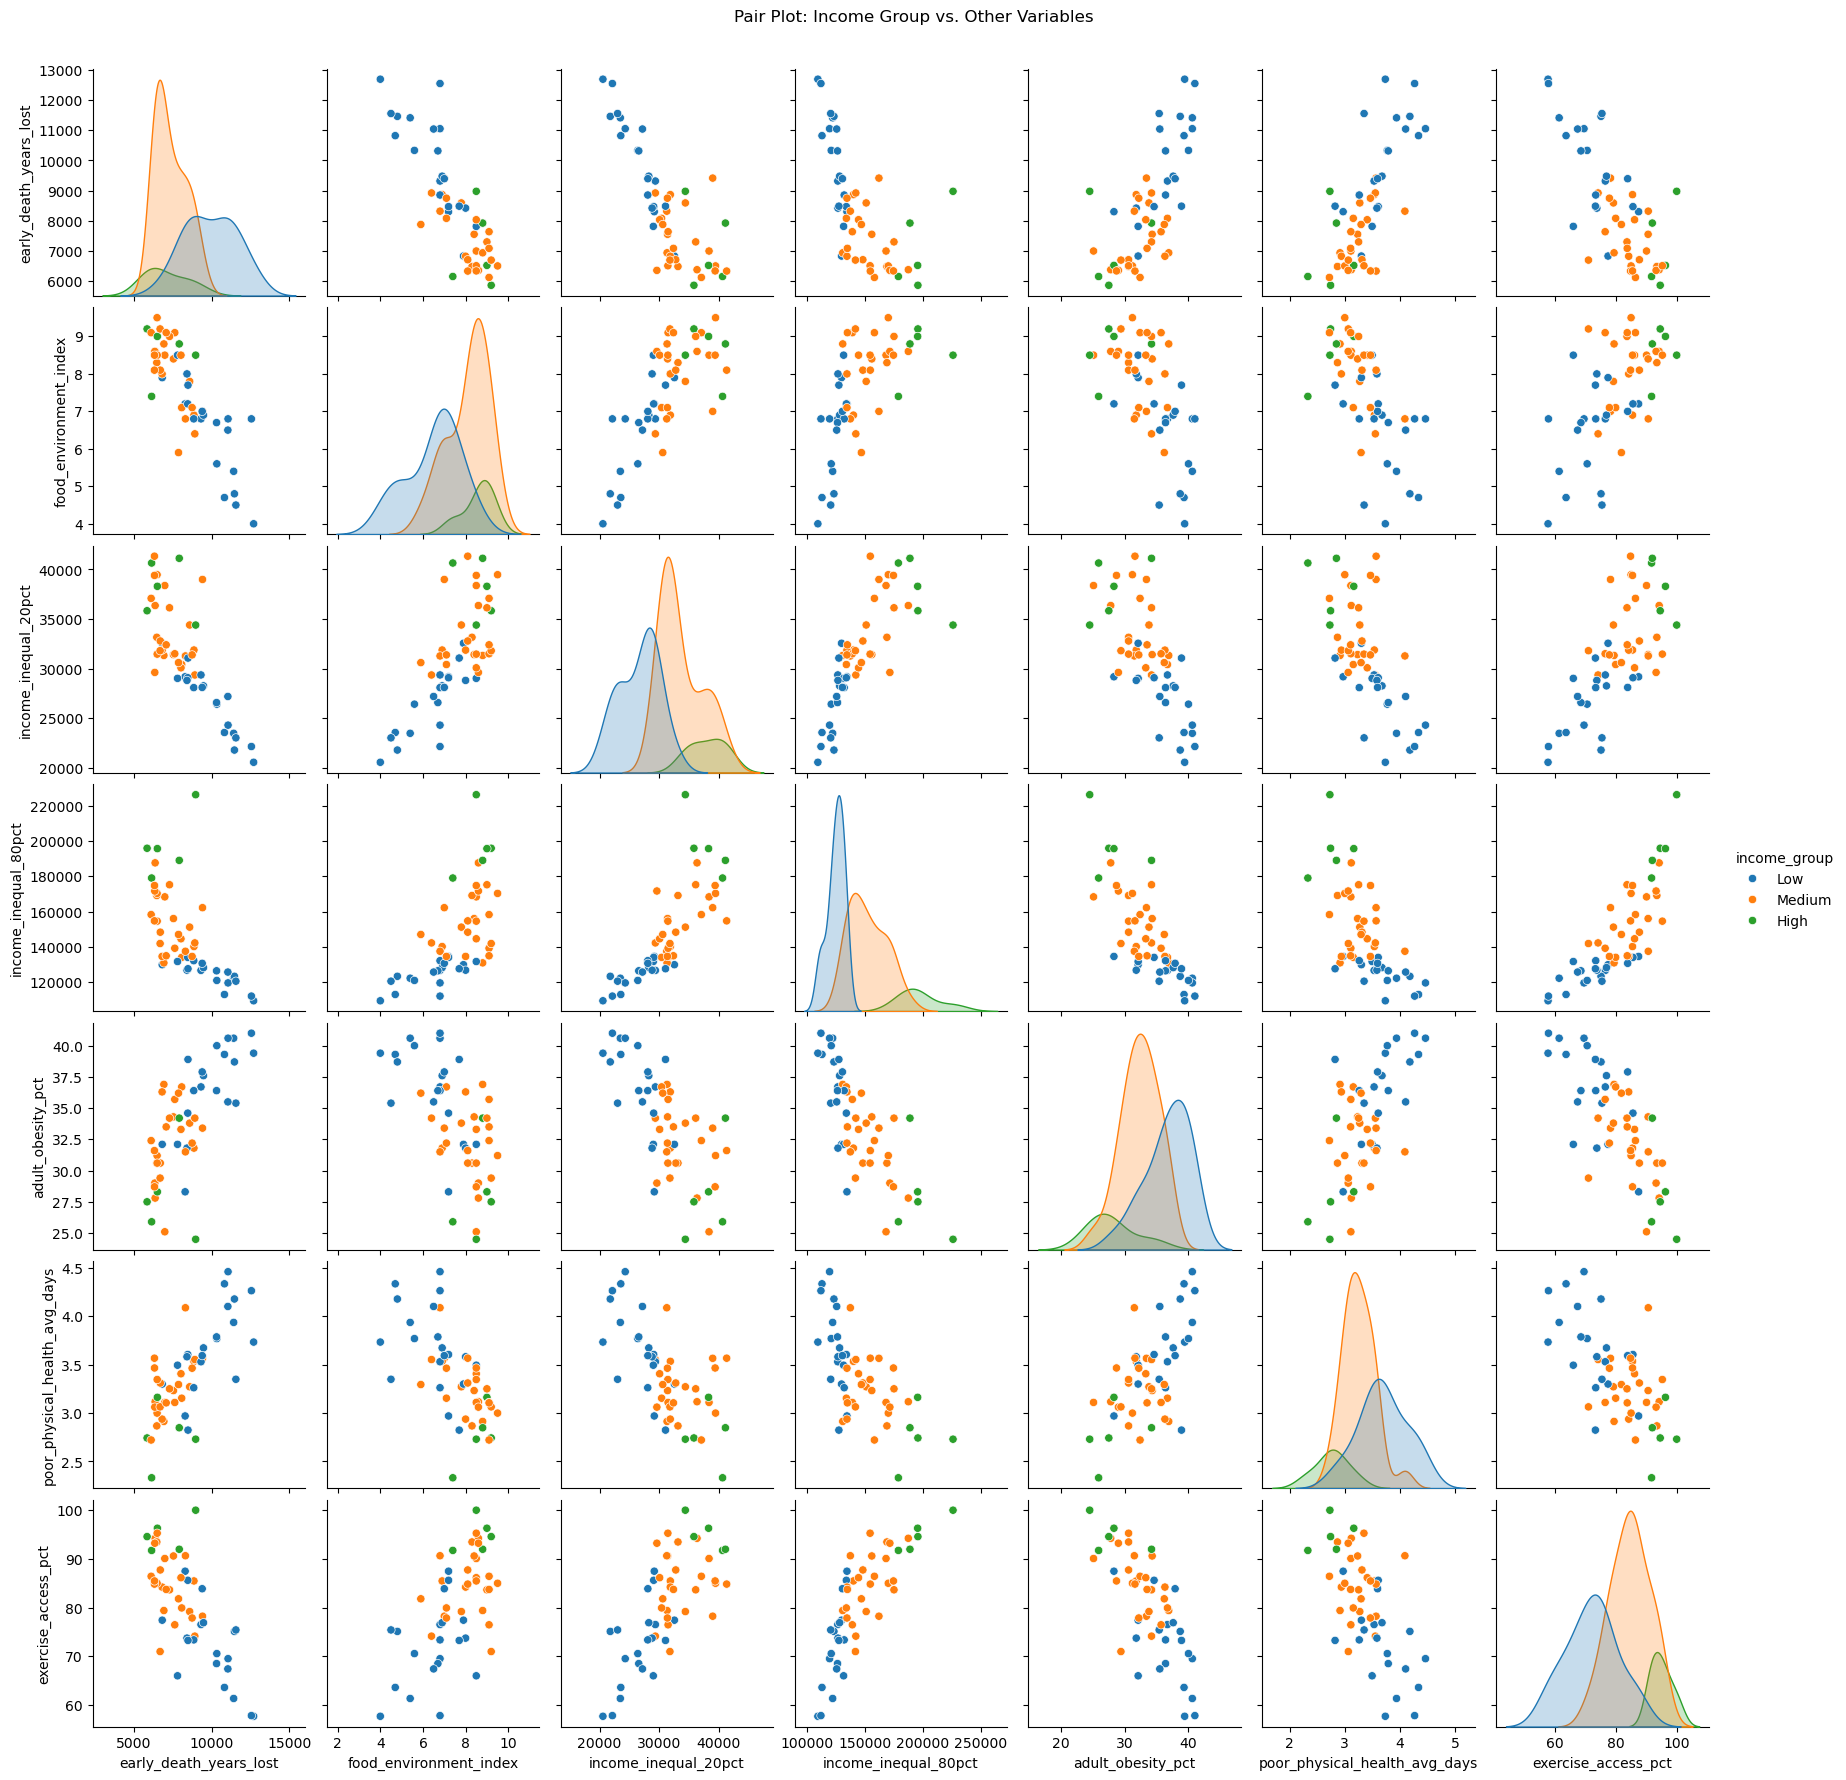

In [46]:

#Define high, medium and low income ranges by bucket

def categorize_income(income):
    if income < 60000:
        return 'Low'
    elif 60000 <= income <= 80000:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
state_df['income_group'] = state_df['median_income'].apply(categorize_income)
sns.pairplot(state_df, hue='income_group', vars=[
    'early_death_years_lost', 
    'food_environment_index',
    'income_inequal_20pct',
    'income_inequal_80pct',
    'adult_obesity_pct',
    'poor_physical_health_avg_days',
    'exercise_access_pct'
])

plt.suptitle('Pair Plot: Income Group vs. Other Variables', y=1.02)
plt.show()

## Median Income is showing some relationships with our selected data measures - let's continue to explore geographic relationships in our next notebook!